### Obtain and read the interest rate dataset

# Content 
- ### [Libraries and Obtain Dataset](#LAOD)
- ### [Understanding of Data](#UOD)
- ### [Basic Linear Regression for Baseline](#BLRFB)
- ### [Linear regression: Baseline vs Feature Engineering](#LRBVFE)
- ### [Add Longitude and Latitude as New Features](#ALLANF)
- ### [Linear regression: With Longtitude and Latitude](#LRWLAL)
- ### [Find Two More Unrelated Datasets for this Dataset](#FTMUDFTD)

### Libraries and Obtain Dataset<a id='LAOD'><a>

In [1]:
!pip install wbgapi

In [2]:
import pandas as pd
import wbgapi as wb        # Collect data using World Bank API
# Obtain and clean up the data using melt and rename variables
df_data_1 = wb.data.DataFrame( 
    'NY.GDP.MKTP.CD', labels=True).reset_index().drop(
    columns='economy').melt(id_vars='Country').rename(
    columns={'variable':'year','value':'gdp (current US$)'})

In [3]:
def truncate_allrows(data,name_col,n): # Create function for truncating year column
    newdata = data
    thelist = list(data[name_col])
    for i in range(0,len(thelist)):      # O(n)
        thelist[i] = int(thelist[i][n:]) # Truncate and intergerize year
    newdata[str.capitalize(name_col)] = thelist # Create new column by capitalizing colname
    return newdata

In [4]:
tidy_data = truncate_allrows(df_data_1,'year',2)
tidy_data = tidy_data[['Country','Year','gdp (current US$)']]

### Understanding of Data<a id='UOD'></a>

In [5]:
print(tidy_data.shape)

(16104, 3)


There are 25,770 rows and 6 columns.

In [6]:
print(tidy_data.head())

                 Country  Year  gdp (current US$)
0               Zimbabwe  1960       1.052990e+09
1                 Zambia  1960       7.130000e+08
2            Yemen, Rep.  1960                NaN
3     West Bank and Gaza  1960                NaN
4  Virgin Islands (U.S.)  1960                NaN


In [7]:
print(tidy_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16104 entries, 0 to 16103
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            16104 non-null  object 
 1   Year               16104 non-null  int64  
 2   gdp (current US$)  12401 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 377.6+ KB
None


In [8]:
for i in tidy_data['Country'].sort_values().unique():
    print(i)

Afghanistan
Albania
Algeria
American Samoa
Andorra
Angola
Antigua and Barbuda
Arab World
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Caribbean small states
Cayman Islands
Central African Republic
Central Europe and the Baltics
Chad
Channel Islands
Chile
China
Colombia
Comoros
Congo, Dem. Rep.
Congo, Rep.
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czech Republic
Denmark
Djibouti
Dominica
Dominican Republic
Early-demographic dividend
East Asia & Pacific
East Asia & Pacific (IDA & IBRD countries)
East Asia & Pacific (excluding high income)
Ecuador
Egypt, Arab Rep.
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Euro area
Europe & Central Asia
Europe & Central Asia (IDA & IBRD countries)
Europe & Central Asia (excluding 

Even though the number of countries in total is 195 today, there are 264 different names in this data. In other words, some of them are not the countries like South Asia and World.

In [9]:
unique_count_per_column = tidy_data.nunique().reset_index()
unique_count_per_column = unique_count_per_column.rename(
    columns = {'index':'names', 0:'count'})

print(unique_count_per_column.sort_values('count'))


               names  count
1               Year     61
0            Country    264
2  gdp (current US$)  12283


As noticed, the years of data collection was 61 in total.

In [10]:
print('The data collection begins from ' + str(df_data_1['Year'].unique()[0]) + 
      ' to '+ str(df_data_1['Year'].unique()[-1])+ '.')

The data collection begins from 1960 to 2020.


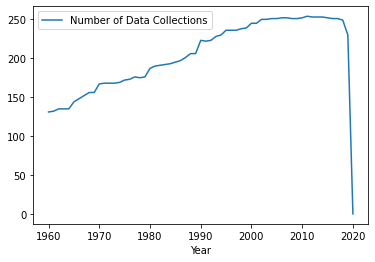

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

collection_by_annual = tidy_data.groupby('Year', as_index=False)[
    'gdp (current US$)'].agg('count').rename(columns={
    'gdp (current US$)':'Number of Data Collections'})

collection_by_annual.plot(x = 'Year', 
                          y = 'Number of Data Collections', 
                          kind = 'line')
plt.show()

Over time, the number of data collections steadily increases as more countries participate. This dataset might imply that a number of countries changes due to former sovereign states or new independent countries. There is no data collection occurred in 2020.  

In [12]:
pd.options.display.float_format = '{:.2f}'.format
theresult = tidy_data.groupby('Country')['gdp (current US$)'].describe()
theresult = theresult.sort_values('count',ascending=False)
pd.set_option('display.max_rows', 264)
print(theresult)

                                                    count              mean  \
Country                                                                       
Latin America & the Caribbean (IDA & IBRD count...  60.00  1911741780970.30   
Malawi                                              60.00     2373005576.57   
Late-demographic dividend                           60.00  5110446844290.28   
Latin America & Caribbean                           60.00  2001946919000.83   
Latin America & Caribbean (excluding high income)   60.00  1820461002961.08   
Lesotho                                             60.00      878347551.01   
Low & middle income                                 60.00  7821348729836.95   
Lower middle income                                 60.00  1558340997442.03   
Luxembourg                                          60.00    21364912706.57   
Madagascar                                          60.00     5004215725.34   
Malaysia                                            

As indicated by above, there are no data collections for Democratic People's Republic of Korea, St. Martin, Gibraltar and British Virgin Islands.  

In [13]:
# List the NaN countries
nan_countries = ["Korea, Dem. People's Rep.",'Not classified',
                 'St. Martin (French part)', 'Gibraltar', 'British Virgin Islands']

# Filter all countries that are in any of NaN countries in data
neat_one = tidy_data[~tidy_data['Country'].isin(nan_countries)]

# Remove the 2020 rows
neat_one = neat_one[neat_one['Year'] != 2020]

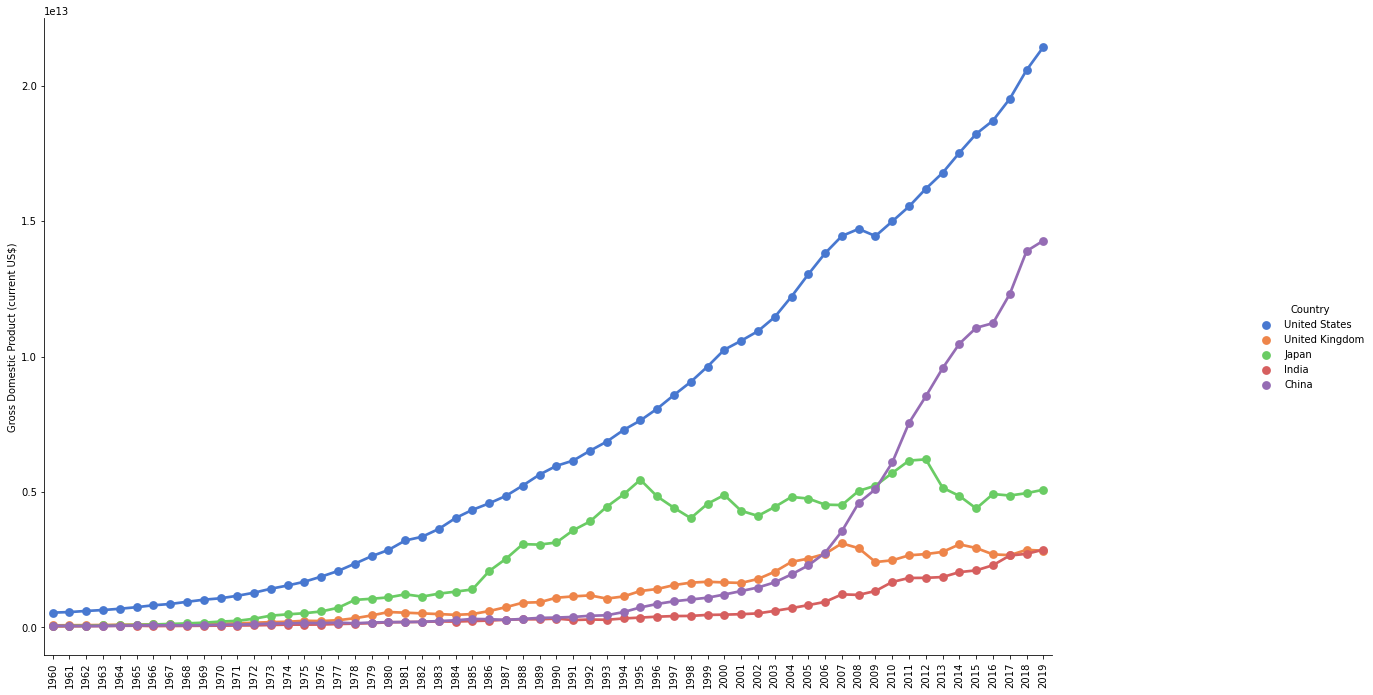

In [14]:
thesubset = neat_one[neat_one['Country'].isin(['United States','China','Japan',
                                              'German','India','United Kingdom'])]

sns.catplot(x = 'Year', 
            y = 'gdp (current US$)', 
            kind = 'point',
            hue = 'Country',
            alpha=.5, palette="muted",
            height=6,
            width = 30,
            data = thesubset)
plt.xticks(rotation=90)
plt.ylabel("Gross Domestic Product (current US$)")
plt.xlabel("")
plt.gcf().set_size_inches(20, 10)
plt.show()

As indicated by this plot, the top five countires have highest GDP in 2019 and in 2019, the China GDP was increasingly closer to the US GDP.

In [15]:
percentage = (int(neat_one[(neat_one['Country'] == 'United States') & 
              (neat_one['Year'] == 2019)]['gdp (current US$)'])/int(
              neat_one[(neat_one['Country'] == 'World') & 
              (neat_one['Year'] == 2019)]['gdp (current US$)']))

print('In 2019, the United States accounted for '+
      '{:.2%}'.format(percentage)+" of the world's Gross Domestic Product (GDP).")

In 2019, the United States accounted for 24.43% of the world's Gross Domestic Product (GDP).


### Basic Linear Regression for Baseline<a id='BLRFB'></a>

In order to determine if the forecasting accuracy improves, using the dataset focuses on the world GDP only that can help determine if adding countries as dummy variables improve its performance.

In [16]:
the_World = neat_one[neat_one['Country'] == 'World']
the_World.head()

,Country,Year,gdp (current US$)
217,World,1960,1369443925011.89
481,World,1961,1425115081577.84
745,World,1962,1530068789423.03
1009,World,1963,1648304927596.87
1273,World,1964,1805673902285.75


### Linear regression: Baseline vs Feature Engineering<a id = 'LRBVFE'></a>

In [17]:
import math
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
trainin = the_World[:math.trunc(int(the_World.shape[0]*.60))]
testing = the_World[math.trunc(int(the_World.shape[0]*.60))+1:] 

In [18]:
def create_array(column):        # Create the specific array for
    thelist = []                 # Lienar Regression
    for i in column:
        thelist.append([i])
    return np.array(thelist)

In [19]:
# Separate endogeneous variable and exogenous variable
trainin_Y = create_array(trainin.reset_index()['gdp (current US$)'])
trainin_X = create_array(trainin.reset_index()['Year'])

# Create the linear regression function
lm = linear_model.LinearRegression()
lm.fit(trainin_X,trainin_Y)

LinearRegression()

In [20]:
testing_Y = create_array(testing.reset_index()['gdp (current US$)'])
testing_X = create_array(testing.reset_index()['Year'])

testing_Y_pred = lm.predict(testing_X)

# The coefficients
print('Coefficients: \n', lm.coef_)
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(testing_Y, testing_Y_pred))


Coefficients: 
 [[8.00295017e+11]]
Coefficient of determination: -0.96


The negative R-squared score means that this model is underfitting and this score is a baseline.

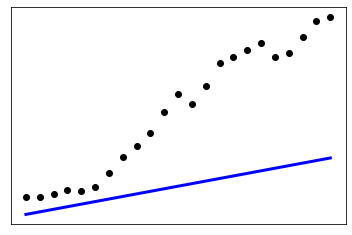

In [21]:
# Plot outputs
plt.scatter(testing_X, testing_Y,  color='black')
plt.plot(testing_X, testing_Y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [22]:
for i in tidy_data['Country'].sort_values().unique():
    print(i)

Afghanistan
Albania
Algeria
American Samoa
Andorra
Angola
Antigua and Barbuda
Arab World
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Caribbean small states
Cayman Islands
Central African Republic
Central Europe and the Baltics
Chad
Channel Islands
Chile
China
Colombia
Comoros
Congo, Dem. Rep.
Congo, Rep.
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czech Republic
Denmark
Djibouti
Dominica
Dominican Republic
Early-demographic dividend
East Asia & Pacific
East Asia & Pacific (IDA & IBRD countries)
East Asia & Pacific (excluding high income)
Ecuador
Egypt, Arab Rep.
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Euro area
Europe & Central Asia
Europe & Central Asia (IDA & IBRD countries)
Europe & Central Asia (excluding 

In [23]:
regions = ['East Asia & Pacific','Europe & Central Asia',
           'Latin America & Caribbean','Middle East & North Africa', 
           'North America','South Asia','Sub-Saharan Africa']

theregion = neat_one[(neat_one['Country'].isin(regions)) & (neat_one[
    'gdp (current US$)'].isna() != True)].rename(columns={'Country':'Region'})

In [24]:
Theregion = pd.get_dummies(theregion, columns = ['Region']) # Create the dummy variables
Theregion.head()

,Year,gdp (current US$),Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa
221,1960,29922675704.17,0,0,0,0,0,0,1
223,1960,47172093787.30,0,0,0,0,0,1,0
231,1960,583846188346.73,0,0,0,0,1,0,0
242,1960,81651479231.46,0,0,1,0,0,0,0
259,1960,153258057233.00,1,0,0,0,0,0,0


In [25]:
def create_multivar_array(data):# Create the specific array for
    thelist = []                 # Lienar Regression
    for i in range(0,len(data)):
        thelist.append(list(data.iloc[i,:]))
    return np.array(thelist)

In [26]:
trainin1 = Theregion[:math.trunc(int(Theregion.shape[0]*.60))]
testing1 = Theregion[math.trunc(int(Theregion.shape[0]*.60))+1:] 

variables = ['Year','Region_East Asia & Pacific',
             'Region_Europe & Central Asia',
             'Region_Latin America & Caribbean',
             'Region_Middle East & North Africa', 
             'Region_North America',
             'Region_South Asia',
             'Region_Sub-Saharan Africa']

trainin_Y1 = create_array(trainin1.reset_index()['gdp (current US$)'])
trainin_X1 = create_multivar_array(trainin1.reset_index()[variables])

In [27]:
# Create the linear regression function
lm1 = linear_model.LinearRegression()
lm1.fit(trainin_X1,trainin_Y1)

LinearRegression()

In [28]:
testing_Y1 = create_array(testing1.reset_index()['gdp (current US$)'])
testing_X1 = create_multivar_array(testing1.reset_index()[variables])

testing_Y1_pred = lm1.predict(testing_X1)

# The coefficients
print('Coefficients: \n', lm1.coef_)
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(testing_Y1, testing_Y1_pred))

Coefficients: 
 [[ 1.14318316e+11  6.90859248e+11  2.59859177e+12 -8.61626092e+11
  -1.63085052e+12  1.85192932e+12 -1.31278107e+12 -1.33612267e+12]]
Coefficient of determination: 0.18


In [29]:
baseline = r2_score(testing_Y, testing_Y_pred)
add_countries = r2_score(testing_Y1, testing_Y1_pred)

per_change = -1*(1-(baseline - add_countries)/baseline)       # Percentage change
print('When the regional areas as dummy variables add, the percentage increase of R-squared score equals '+
     '{:.2%}'.format(per_change)+".")

When the regional areas as dummy variables add, the percentage increase of R-squared score equals 18.63%.


### Add Longitude and Latitude as New Features<a id='ALLANF'></a>

In [30]:
# Get all economy codes
thedata = wb.data.DataFrame('NY.GDP.MKTP.CD',
    labels=True).reset_index()
idnames = thedata['economy']

In [31]:
# Find the latitudes and longitudes
emptylong = []
emptylati = []
for i in idnames:
    emptylong.append(wb.economy.get(i)['longitude'])
    emptylati.append(wb.economy.get(i)['latitude'])

In [32]:
# Coerce the lists into pandas dataframe
dictionary = {'Code': idnames, 'Longtitude': emptylong, 
              'Latitude': emptylati}
latilong = pd.DataFrame(dictionary)
display(latilong.head())

,Code,Longtitude,Latitude
0,ZWE,31.07,-17.83
1,ZMB,28.29,-15.40
2,YEM,44.21,15.35
3,PSE,nan,nan
4,VIR,-64.90,18.34


In [33]:
withlatilong = latilong.merge(thedata[['economy','Country']], how = 'inner',
    left_on = 'Code', right_on = 'economy')[['Country',
    'Longtitude','Latitude']]
display(withlatilong.head())

,Country,Longtitude,Latitude
0,Zimbabwe,31.07,-17.83
1,Zambia,28.29,-15.40
2,"Yemen, Rep.",44.21,15.35
3,West Bank and Gaza,nan,nan
4,Virgin Islands (U.S.),-64.90,18.34


In [34]:
# Left join neat dataset with dataset that has latitude and longtitude
neat_withlalo = neat_one.merge(withlatilong, 
                how = 'left', on = 'Country')

In [35]:
def data_counting_null(data):
    columns = list(data.columns)
    emptydict = {}
    keys = range(0,len(columns))
    for i in keys:
        name = columns[i]
        value = len(data[data[name].isnull()][name])
        emptydict[name] = value
    thedict = dict(emptydict)
    return thedict

In [36]:
display(data_counting_null(neat_withlalo))

{'Country': 0,
 'Year': 0,
 'gdp (current US$)': 3139,
 'Longtitude': 3000,
 'Latitude': 3000}

In [37]:
print(data_counting_null(neat_withlalo)['Longtitude'])

3000


Total of nan for both Longtitude and Latitudes is 3000

In [38]:
percent= data_counting_null(neat_withlalo)[
    'Longtitude']/len(neat_withlalo)
print('But the missing longtitudes and longtitudes only account for '+
     '{:.2%}'.format(percent)+' of entire rows in the dataset so that'+
     ' the nan rows can be removed.')

But the missing longtitudes and longtitudes only account for 19.31% of entire rows in the dataset so that the nan rows can be removed.


In [39]:
def data_remove_null(data):
    columns = list(data.columns)
    for i in columns:
        data = data[data[i].notnull()]
    return data

In [40]:
cleaned_data = data_remove_null(neat_withlalo) 
display(cleaned_data.head())

,Country,Year,gdp (current US$),Longtitude,Latitude
0,Zimbabwe,1960,1052990400.00,31.07,-17.83
1,Zambia,1960,713000000.00,28.29,-15.40
6,"Venezuela, RB",1960,7779090909.09,-69.84,9.08
9,Uruguay,1960,1242289239.20,-56.07,-34.89
10,United States,1960,543300000000.00,-77.03,38.89


### Linear regression: With Longtitude and Latitude <a id = 'LRWLAL'></a>

In [41]:
trainin2 = cleaned_data[:math.trunc(int(cleaned_data.shape[0]*.60))]
testing2 = cleaned_data[math.trunc(int(cleaned_data.shape[0]*.60))+1:]

variables = ['Year', 'Longtitude','Latitude']

trainin_Y2 = create_array(trainin2.reset_index()['gdp (current US$)'])
trainin_X2 = create_multivar_array(trainin2.reset_index()[variables])

testing_Y2 = create_array(testing2.reset_index()['gdp (current US$)'])
testing_X2 = create_multivar_array(testing2.reset_index()[variables])

lm2 = linear_model.LinearRegression()
lm2.fit(trainin_X2,trainin_Y2)

testing_Y2_pred = lm2.predict(testing_X2)

In [42]:
# The coefficients
print('Coefficients: \n', lm2.coef_)
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(testing_Y2, testing_Y2_pred))

Coefficients: 
 [[ 4.37701987e+09 -1.55612429e+08  2.82913137e+09]]
Coefficient of determination: 0.01


### Find Two More Unrelated Datasets for this Dataset<a id='FTMUDFTD'></a>

find 2 more datasets unrelated to this dataset and write 2 more brief descriptions of these datasets and short proposals for 2 projects, these data descriptions and proposals can be similar to the Jupyter notebook you composed after our first call, with the addition of information about how to acquire the data (urls to the data)